# Set-up

In [0]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
np.random.seed(42)

data = pd.read_csv("/surveys_merge.csv", header=[0,1,2])

In [0]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Harlem2019"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
data.head()

,Q1_1,Q1_2,Q1_3,Q1_4,Q1_5,Q1_6,Q1_7,Q1_8,Q1_9,Q1_10,Q1_11,Q1_12,Q1_13,Q1_14,Q2_1,Q2_2,Q2_3,Q2_4,Q2_5,Q2_6,Q2_7,Q3_1,Q3_2,Q3_3,Q3_4,Q3_5,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q4_7,Q9_1,Q9_2,Q9_3,Q9_4,Q9_5,Q9_6,Q9_7,...,Q8_6,Q8_7,Q8_8,Q8_9,Q10_1,Q10_2,Q10_3,Q10_4,Q10_5,Q10_6,Q10_7,Q10_8,Q10_9,Q10_10,Q10_11,Q10_12,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q20_7,Q20_8,Q21,Q22,Q24,Q23
,Please share your experience with computers and the Internet by addressing the following statements. - Used a computer,Please share your experience with computers and the Internet by addressing the following statements. - Surfed the Internet,Please share your experience with computers and the Internet by addressing the following statements. - Sent a message by electronic mail (e-mail),Please share your experience with computers and the Internet by addressing the following statements. - Read news on the Internet,Please share your experience with computers and the Internet by addressing the following statements. - Played a computer game,Please share your experience with computers and the Internet by addressing the following statements. - Looked up information on the Internet,Please share your experience with computers and the Internet by addressing the following statements. - Searched for a job on the Internet.,Please share your experience with computers and the Internet by addressing the following statements. - Made a purchase on the Internet.,Please share your experience with computers and the Internet by addressing the following statements. - Used social media,Please share your experience with computers and the Internet by addressing the following statements. - Played a computer game on the Internet,Please share your experience with computers and the Internet by addressing the following statements. - Used virtual reality or augmented reality on the Internet,Please share your experience with computers and the Internet by addressing the following statements. - Conducted banking or financial transactions on the Internet.,Please share your experience with computers and the Internet by addressing the following statements. - Applied for a job on the Internet.,Please share your experience with computers and the Internet by addressing the following statements. - Looked up directions to a new location on the Internet.,Please share your experience with computers and the Internet by addressing the following statements. - Bought a computer,"Please share your experience with computers and the Internet by addressing the following statements. - Connected new component to a computer, for example plugged in a web-based camera","Please share your experience with computers and the Internet by addressing the following statements. - Repaired or retrofitted a computer, for example installed a memory card",Please share your experience with computers and the Internet by addressing the following statements. - Installed software on a computer,Please share your experience with computers and the Internet by addressing the following statements. - Updated software on a computer,"Please share your experience with computers and the Internet by addressing the following statements. - Addressed software errors, for example troubleshooting error",Please share your experience with computers and the Internet by addressing the following statements. - Wrote or coded new software,Please share your computer skills by addressing the following statements. - Created a webpage,Please share your computer skills by addressing the following statements. - Created a web-based application,Please share your computer skills by addressing the following statements. - Backed up files to protect against data loss,Please share your computer skills by addressing the following statements. - Installed software to protect a computer from viruses and malware,Please share your computer skills by addressing the following statements. - Updated software to

## Preprocessing

In [0]:
Q1_ANSWER_MAP = {"Never in my life" : 0, "Not in the past year" : 1, "ONCE or TWICE in the past year" : 2, 
               "Three or more times in the past year" : 3, "More than 15 times in the past year" : 4}
data.iloc[:, :14] = data.iloc[:, :14].replace(Q1_ANSWER_MAP)        

In [0]:
Q2_3_ANSWER_MAP = {"Never in my life" : 0, "More than 5 years ago" : 1, "Not in the past year" : 2, 
               "Within the last year" : 3, "Within the last month" : 4}
data.iloc[:, 14:26] = data.iloc[:, 14:26].replace(Q2_3_ANSWER_MAP)  

In [0]:
Q4_9_ANSWER_MAP = {float("NaN"): 1, "Check all that apply": 0}
data.iloc[:, 26:43] = data.iloc[:, 26:43].replace(Q4_9_ANSWER_MAP)

In [0]:
Q5_ANSWER_MAP = {"Strongly disagree" : -2, "Disagree" : -1, "Neither agree nor disagree" : 0, 
                 "Agree" : 1, "Strongly Agree": 2, "Strongly agree": 2}
data.iloc[:, 43:55] = data.iloc[:, 43:55].replace(Q5_ANSWER_MAP)

In [0]:
Q7_ANSWER_MAP = {"Strongly disagree" : -3, "Somewhat disagree": -1, "Disagree" : -2, "Neither agree nor disagree" : 0, 
                 "Agree" : 2, "Somewhat agree": 1, "Strongly agree": 3}
data[['Q7']] = data[['Q7']].replace(Q7_ANSWER_MAP)

In [0]:
Q8_ANSWER_MAP = {"Never in my life" : 0, "Not in the past year" : 1, "ONCE or TWICE in the past year." : 2, 
               "Three or more times in the past year" : 3, "More than 15 times in the past year." : 4}
data.iloc[:, 68:77] = data.iloc[:, 68:77].replace(Q8_ANSWER_MAP)

In [0]:
Q10_ANSWER_MAP = {float("NaN"): 0, "Check all that apply": 1}
data.iloc[:, 77:89] = data.iloc[:, 77:89].replace(Q10_ANSWER_MAP)

In [0]:
Q13_ANSWER_MAP = {"Strongly disagree" : -3, "Somewhat disagree": -1, "Disagree" : -2, "Neither agree nor disagree" : 0, 
                 "Agree" : 2, "Somewhat agree": 1, "Strongly agree": 3}
data.iloc[:, 64:68] = data.iloc[:, 64:68].replace(Q13_ANSWER_MAP)

In [0]:
Q14_ANSWER_MAP = {"Strongly disagree" : -2, "Somewhat disagree": -1, "Neither agree nor disagree" : 0, 
                 "Somewhat agree": 1, "Strongly agree": 2}
data.iloc[:, 89:101] = data.iloc[:, 89:101].replace(Q13_ANSWER_MAP)

In [0]:
Q20_ANSWER_MAP = {"Refuse to answer": 0, "Can't choose": 0, "Have not done it and would never do it": 1, 
                 "Have not done it but might do it": 2, "Have done it in the more distant past": 3, 
                 "Have done it in the past year": 4}
data.iloc[:, 101:109] = data.iloc[:, 101:109].replace(Q20_ANSWER_MAP)

In [0]:
Q22_ANSWER_MAP = {"Attended high school, but did not graduate": 0, "High school graduate": 1, 
                  "Attended college, but did not graduate for a 4-year college": 2, 
                 "Graduated from a 4-year college": 3, "Attended graduate or profession school, but did not graduate": 4, 
                 "Graduated from a graduate or professional school (e.g. MBA, MPA, JD, MD)": 5}
data.iloc[:, 110] = data.iloc[:, 110].replace(Q22_ANSWER_MAP)

In [0]:
data.iloc[:, 111] = data.iloc[:, 111].replace(float('nan'), "Refuse to answer") 

In [0]:
data = pd.concat([data,pd.get_dummies(data['Q24'],prefix=['Q24'])],axis=1)

In [0]:
data = data.drop(columns=data.columns[111])

In [0]:
Q23_ANSWER_MAP = {"Less than $10,000": 1, "$10,000 - $14,999": 2, 
                  "$15,000 - $24,999": 3, "$25,000 - $34,999": 4, 
                  "$35,000 - 49,999": 5, "$50,000 - $74,999": 6, 
                  "$75,000 - $99,999": 7, "$100,000 - $149,999": 8, 
                  "$150,000 - $199,999": 9, "$200,000+": 10,
                  "Refuse to answer": float('nan'), "Don't know": float('nan')}
data.iloc[:, 111] = data.iloc[:, 111].replace(Q23_ANSWER_MAP)

In [0]:
#Dropping Q6 and Q21
data = data.drop(columns=data.columns[55:64])
data = data.drop(columns=data.columns[100])

In [0]:
sample_incomplete_rows = data[data.isnull().any(axis=1)]
print(len(sample_incomplete_rows))

212


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="constant", fill_value=-999)

In [0]:
imputer.fit(data)

SimpleImputer(add_indicator=False, copy=True, fill_value=-999,
              missing_values=nan, strategy='constant', verbose=0)

In [0]:
data_copy = data.copy()
data_imputed = imputer.transform(data_copy)
data_imputed = pd.DataFrame(data_imputed, columns = data.columns)
data_imputed = data_imputed.astype(int)

In [0]:
data_imputed.head()

,"(Q1_1, Please share your experience with computers and the Internet by addressing the following statements. - Used a computer, {""ImportId"":""QID36_1""})","(Q1_2, Please share your experience with computers and the Internet by addressing the following statements. - Surfed the Internet, {""ImportId"":""QID36_2""})","(Q1_3, Please share your experience with computers and the Internet by addressing the following statements. - Sent a message by electronic mail (e-mail), {""ImportId"":""QID36_3""})","(Q1_4, Please share your experience with computers and the Internet by addressing the following statements. - Read news on the Internet, {""ImportId"":""QID36_4""})","(Q1_5, Please share your experience with computers and the Internet by addressing the following statements. - Played a computer game, {""ImportId"":""QID36_5""})","(Q1_6, Please share your experience with computers and the Internet by addressing the following statements. - Looked up information on the Internet, {""ImportId"":""QID36_6""})","(Q1_7, Please share your experience with computers and the Internet by addressing the following statements. - Searched for a job on the Internet., {""ImportId"":""QID36_12""})","(Q1_8, Please share your experience with computers and the Internet by addressing the following statements. - Made a purchase on the Internet., {""ImportId"":""QID36_13""})","(Q1_9, Please share your experience with computers and the Internet by addressing the following statements. - Used social media, {""ImportId"":""QID36_7""})","(Q1_10, Please share your experience with computers and the Internet by addressing the following statements. - Played a computer game on the Internet, {""ImportId"":""QID36_8""})","(Q1_11, Please share your experience with computers and the Internet by addressing the following statements. - Used virtual reality or augmented reality on the Internet, {""ImportId"":""QID36_9""})","(Q1_12, Please share your experience with computers and the Internet by addressing the following statements. - Conducted banking or financial transactions on the Internet., {""ImportId"":""QID36_10""})","(Q1_13, Please share your experience with computers and the Internet by addressing the following statements. - Applied for a job on the Internet., {""ImportId"":""QID36_11""})","(Q1_14, Please share your experience with computers and the Internet by addressing the following statements. - Looked up directions to a new location on the Internet., {""ImportId"":""QID36_14""})","(Q2_1, Please share your experience with computers and the Internet by addressing the following statements. - Bought a computer, {""ImportId"":""QID34_1""})","(Q2_2, Please share your experience with computers and the Internet by addressing the following statements. - Connected new component to a computer, for example plugged in a web-based camera, {""ImportId"":""QID34_2""})","(Q2_3, Please share your experience with computers and the Internet by addressing the following statements. - Repaired or retrofitted a computer, for example installed a memory card, {""ImportId"":""QID34_3""})","(Q2_4, Please share your experience with computers and the Internet by addressing the following statements. - Installed software on a computer, {""ImportId"":""QID34_4""})","(Q2_5, Please share your experience with computers and the Internet by addressing the following statements. - Updated software on a computer, {""ImportId"":""QID34_5""})","(Q2_6, Please share your experience with computers and the Internet by addressing the following statements. - Addressed software errors, for example troubleshooting error, {""ImportId"":""QID34_6""})","(Q2_7, Please share your experience with computers and the Internet by addressing the following statements. - Wrote or coded new software, {""ImportId"":""QID34_7""})","(Q3_1, Please share your computer skills by addressing the following statements. - Created a webpage, {""ImportId"":""QID35_1""})","(Q3_2, Please share your computer skills by addressing the following 

In [0]:
sample_incomplete_rows = data_imputed[data_imputed.isnull().any(axis=1)]
print(len(sample_incomplete_rows))

0


# Feature Engineering

In [0]:
# created a function to reuse with different data preprocessing
def build_features(data_imputed):
  fun_mat = data_imputed.iloc[:,[7,6,11,12,17,18,24]]
  functional_score = fun_mat.sum(axis=1)
  devices_mat = data_imputed.iloc[:, 26:33].as_matrix()
  devices = devices_mat.sum(axis=1)
  political_eng_mat = data_imputed.iloc[:,92:100].as_matrix()
  political_engagement = political_eng_mat.sum(axis=1)
  income_category = data_imputed.iloc[:,101]
  education = data_imputed.iloc[:,100]
  home_internet_connection = data_imputed.iloc[:,43]
  sd_mat = data_imputed.iloc[:,[16,19,20,21,22]].as_matrix()
  system_design_score = sd_mat.sum(axis=1)
  casual_mat = data_imputed.iloc[:,[0,1,2,3,4,5,8,9,10,13]].as_matrix()
  casual_score = casual_mat.sum(axis=1)
  new_features = pd.concat([pd.Series(functional_score), pd.Series(devices), 
                          pd.Series(political_engagement), pd.Series(income_category), 
                          pd.Series(education), pd.Series(home_internet_connection), 
                          pd.Series(system_design_score), pd.Series(casual_score)], axis=1)
  new_features.columns = ["functional score",  "num devices", "political engagement", 
                "income category", "education level", "home internet connection",
                "system design score", "casual score"]
  return new_features

new_features = build_features(data_imputed)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


In [0]:
new_features

,functional score,num devices,political engagement,income category,education level,home internet connection,system design score,casual score
0,-6993,7,-7992,-999,-999,-999,-4995,-9990
1,23,5,25,6,-999,2,18,31
2,26,2,-7992,9,4,2,-1988,38
3,24,2,32,9,3,1,8,40
4,23,5,23,3,5,2,8,36
...,...,...,...,...,...,...,...,...
307,15,4,20,3,2,-2,0,36
308,4,4,11,1,1,2,6,18
309,5,6,28,-999,1,-1,1,10
310,12,1,30,-999,2,1,10,37


# Analysis

## Income vs. Mean Functional Score

In [0]:
means = []
n = 0
for income_cat in range(1,11):
    entries = new_features.loc[new_features['income category'] == income_cat]
    entries = entries.loc[new_features["functional score"] > 0]
    n += len(entries)
    means.append(sum(entries['functional score']) / len(entries))
print("n =", n)

n = 173


Saving figure Income vs. Mean Functional Score


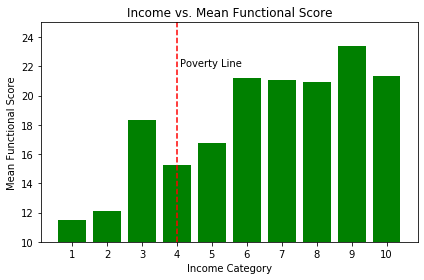

In [0]:
import numpy as np
x = np.linspace(1,10,10)
plt.bar((x), means, color='g')
plt.xlabel("Income Category")
plt.ylabel("Mean Functional Score")
plt.ylim(10,25)
plt.xticks(np.linspace(1,10,10))
plt.vlines(4,10,25,'r','dashed',label="Poverty Line")
plt.text(4.1, 22, 'Poverty Line')
plt.title("Income vs. Mean Functional Score")
save_fig("Income vs. Mean Functional Score")

## Income vs. Mean System Design Score

In [0]:
means = []
n = 0
for income_cat in range(1,11):
    entries = new_features.loc[new_features['income category'] == income_cat]
    entries = entries.loc[new_features["system design score"] > 0]
    n += len(entries)
    means.append(sum(entries['system design score']) / len(entries))
print("n =", n)

n = 138


Saving figure Income vs. Mean System Design Score


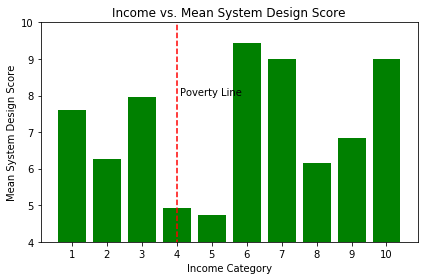

In [0]:
import numpy as np
x = np.linspace(1,10,10)
plt.bar((x), means, color='g')
plt.xlabel("Income Category")
plt.ylabel("Mean System Design Score")
plt.ylim(4,10)
plt.xticks(np.linspace(1,10,10))
plt.vlines(4,0,10,'r','dashed',label="Poverty Line")
plt.text(4.1, 8, 'Poverty Line')
plt.title("Income vs. Mean System Design Score")
save_fig("Income vs. Mean System Design Score")

## Home Internet Connection vs. Mean Functional Score

In [0]:
means = []
n = 0
for hic in range(-2,3):
    entries = new_features.loc[new_features['home internet connection'] == hic]
    entries = entries.loc[new_features["functional score"] > 0]
    n += len(entries)
    means.append(sum(entries['functional score']) / len(entries))
print("n =", n)

n = 234


Saving figure Home Internet Connection vs. Mean Functional Score


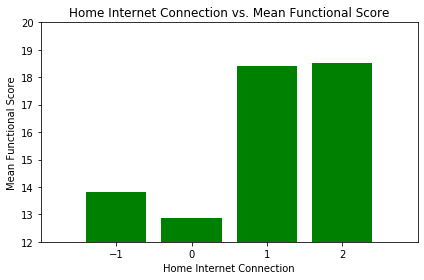

In [0]:
import numpy as np
plt.bar(list(range(-2,3)), means, color='g')
plt.xlabel("Home Internet Connection")
plt.ylabel("Mean Functional Score")
plt.ylim(12,20)
plt.xlim(-2,3)
plt.xticks(np.linspace(-1,2,4))
plt.title("Home Internet Connection vs. Mean Functional Score")
save_fig("Home Internet Connection vs. Mean Functional Score")

Paired T-test for previous result

In [0]:
entries = new_features.loc[new_features["functional score"] > 0]

group1 = entries.loc[entries['home internet connection'] >= -2]
group1 = group1.loc[group1['home internet connection'] <= 0]
group1 = group1['functional score'].tolist()

group2 = entries.loc[entries['home internet connection'] >= 1]
group2 = group2['functional score'].tolist()

print("n Group 1: ", len(group1))
print("n Group 2: ",len(group2))
from scipy import stats
print(stats.ttest_ind(group1,group2))

n Group 1:  44
n Group 2:  190
Ttest_indResult(statistic=-4.687958422220268, pvalue=4.7079678000774744e-06)


## Functional Score vs. Mean Political Engagement Score

In [0]:
means = []
n = 0
for fun_score in range(0,30, 5):
    entries = new_features.loc[new_features["functional score"] >= fun_score]
    entries = entries.loc[entries["functional score"] < fun_score+5]
    entries.head()
    entries = entries.loc[entries['political engagement'] >= 0]
    n += len(entries)
    if len(entries > 0):
      means.append(sum(entries['political engagement']) / len(entries))
    else: print(fun_score)
print("n =", n)

n = 242


Saving figure Functional Score vs. Mean Political Engagement Score


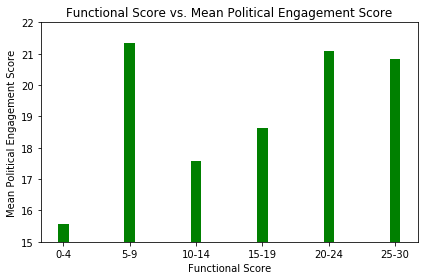

In [0]:
plt.bar(list(range(0,30,5)), means, color='g')
plt.xlabel("Functional Score")
plt.ylabel("Mean Political Engagement Score")
plt.ylim(15,22)
plt.xticks(list(range(0,30,5)),labels=["0-4", "5-9", "10-14", "15-19", "20-24", "25-30"])
#plt.Axes.set_xticklabels(labels=["0-4", "5-9", "10-14", "15-19", "20-24", "25-30"])
plt.title("Functional Score vs. Mean Political Engagement Score")
save_fig("Functional Score vs. Mean Political Engagement Score")

## Race vs. Home Internet Connection

In [0]:
means = []
n = 0
race_idx = [1,2,3,7]
for race in race_idx:
    entries = data_imputed.loc[data_imputed.iloc[:,102+race] == 1]
    entries = entries.loc[entries.iloc[:,55] > -5]
    n += len(entries)
    means.append(sum(entries.iloc[:,55]) / len(entries))
print("n =", n)

n = 233


In [0]:
means

[1.6666666666666667, 1.50625, 1.3695652173913044, 1.3333333333333333]

In [0]:
means.sort()

In [0]:
print(means)

[1.3333333333333333, 1.3695652173913044, 1.50625, 1.6666666666666667]


American Indian or Alaskan or Hawaiian Native: 3 
Asian:  1.6666666666666667
Black / African American: 1.50625
Hispanic / Latino: 1.37 
Middle Eastern: 0.0
Other: 2.033
Refuse to answer: 2.1538
White / Caucasian: 1.333333333

Saving figure Race vs. Home Internet Connection


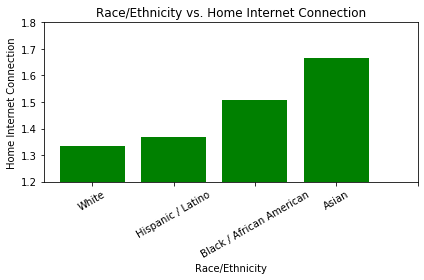

In [0]:
plt.bar(list(range(4)), means, color='g')
plt.xlabel("Race/Ethnicity")
plt.ylabel("Home Internet Connection")
plt.ylim(1.2,1.8)
plt.xticks(list(range(5)),labels=["White", "Hispanic / Latino", 
                                  "Black / African American", "Asian", 
                                  ])
plt.tick_params(axis='x', rotation=30)
plt.title("Race/Ethnicity vs. Home Internet Connection")
save_fig("Race vs. Home Internet Connection")

## Income vs. Home Internet Connection

In [0]:
means = []
n = 0
for income_cat in range(1,11):
    entries = new_features.loc[new_features['income category'] == income_cat]
    entries = entries.loc[new_features["home internet connection"] > -10]
    n += len(entries)
    means.append(sum(entries['home internet connection']) / len(entries))
print("n =", n)

n = 198


Saving figure Income vs. Home Internet Connection


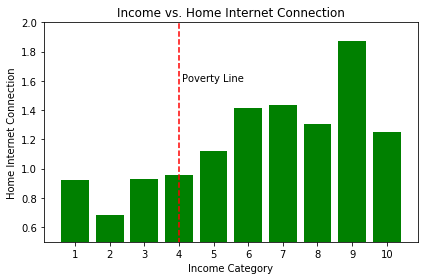

In [0]:
x = np.linspace(1,10,10)
plt.bar((x), means, color='g')
plt.xlabel("Income Category")
plt.ylabel("Home Internet Connection")
plt.ylim(.5,2)
plt.xticks(np.linspace(1,10,10))
plt.vlines(4,0,2,'r','dashed',label="Poverty Line")
plt.text(4.1, 1.6, 'Poverty Line')
plt.title("Income vs. Home Internet Connection")
save_fig("Income vs. Home Internet Connection")

## K-means clustering to differentiate user groups

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(data)
data_copy = data.copy()
data_imputed = imputer.transform(data_copy)
data_imputed = pd.DataFrame(data_imputed, columns = data.columns)
data_imputed = data_imputed.astype(int)

In [0]:
sample_incomplete_rows = data_imputed[data_imputed.isnull().any(axis=1)]
print(len(sample_incomplete_rows))

0


In [0]:
new_features = build_features(data_imputed)
new_features

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


,functional score,num devices,political engagement,income category,education level,home internet connection,system design score,casual score
0,12,7,16,4,2,1,2,24
1,23,5,25,6,2,2,18,31
2,26,2,16,9,4,2,11,38
3,24,2,32,9,3,1,8,40
4,23,5,23,3,5,2,8,36
...,...,...,...,...,...,...,...,...
307,15,4,20,3,2,-2,0,36
308,4,4,11,1,1,2,6,18
309,5,6,28,4,1,-1,1,10
310,12,1,30,4,2,1,10,37


In [0]:
sample_incomplete_rows = new_features[new_features.isnull().any(axis=1)]
print(len(sample_incomplete_rows))

0


In [0]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit_transform(new_features)

from sklearn.cluster import KMeans
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(new_features) + 1

In [0]:
kmeans.cluster_centers_

array([[20.48809524, 13.78571429,  4.42857143,  2.27380952,  1.33333333,
         6.79761905, 33.69047619],
       [ 1.78688525, 16.24590164,  2.98360656,  1.3442623 ,  0.06557377,
         0.42622951,  8.80327869],
       [22.87356322, 25.54022989,  5.40229885,  3.03448276,  1.36781609,
         9.03448276, 35.70114943],
       [10.2125    , 18.8375    ,  4.025     ,  1.9125    ,  1.175     ,
         1.8875    , 27.025     ]])

In [0]:
from collections import Counter, defaultdict
print(Counter(kmeans.labels_))

Counter({2: 87, 0: 84, 3: 80, 1: 61})


In [0]:
for i in range(len(kmeans.cluster_centers_)):
  print("Cluster {}:".format(i+1))
  for j in range(len(kmeans.cluster_centers_[0])):
    print('\t {}: {}'.format(new_features.columns[j], round(kmeans.cluster_centers_[i][j], 2)))

Cluster 1:
	 functional score: 20.49
	 political engagement: 13.79
	 income category: 4.43
	 education level: 2.27
	 home internet connection: 1.33
	 system design score: 6.8
	 casual score: 33.69
Cluster 2:
	 functional score: 1.79
	 political engagement: 16.25
	 income category: 2.98
	 education level: 1.34
	 home internet connection: 0.07
	 system design score: 0.43
	 casual score: 8.8
Cluster 3:
	 functional score: 22.87
	 political engagement: 25.54
	 income category: 5.4
	 education level: 3.03
	 home internet connection: 1.37
	 system design score: 9.03
	 casual score: 35.7
Cluster 4:
	 functional score: 10.21
	 political engagement: 18.84
	 income category: 4.03
	 education level: 1.91
	 home internet connection: 1.18
	 system design score: 1.89
	 casual score: 27.02


In [0]:
new_features = new_features.drop(['num devices'], axis=1)